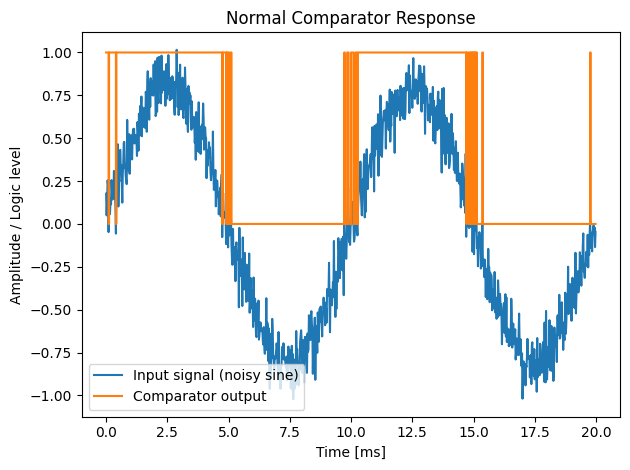

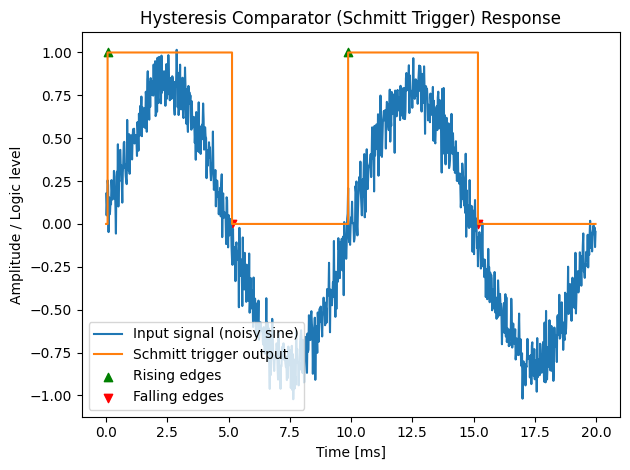

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
np.random.seed(0)                       # reproducibility
fs = 50_000                             # sampling frequency [Hz]
duration = 0.02                         # signal duration 20 ms
f_sig = 100                           # sine frequency 1 kHz
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Model signal: sine with small additive noise
signal = 0.8 * np.sin(2*np.pi*f_sig*t)          # base sine
noise = 0.1 * np.random.randn(len(t))          # white noise
x = signal + noise                              # noisy signal

# -----------------------------
# 1. Normal comparator
# -----------------------------
thresh = 0.0                                     # threshold
y_cmp = np.where(x >= thresh, 1.0, 0.0)

# -----------------------------
# 2. Hysteresis comparator (Schmitt trigger)
# -----------------------------
upper, lower = 0.2, -0.2                         # hysteresis thresholds
y_schmitt = np.zeros_like(x)
state = 0.0
for i, sample in enumerate(x):
    if state == 0.0 and sample >= upper:
        state = 1.0
    elif state == 1.0 and sample <= lower:
        state = 0.0
    y_schmitt[i] = state

d = np.diff(y_schmitt.astype(int))      # diff（+1 なら立ち上がり, −1 なら立ち下がり）
rise_idx = np.where(d ==  1)[0] + 1  # 立ち上がり位置
fall_idx = np.where(d == -1)[0] + 1  # 立ち下がり位置


# -----------------------------
# Plot results
# (One chart per the tool guidelines)
# -----------------------------

# Chart 1: Normal comparator
plt.figure()
plt.plot(t*1e3, x, label="Input signal (noisy sine)")
plt.step(t*1e3, y_cmp, where="post", label="Comparator output")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude / Logic level")
plt.title("Normal Comparator Response")
plt.legend()
plt.tight_layout()

# Chart 2: Hysteresis comparator
plt.figure()
plt.plot(t*1e3, x, label="Input signal (noisy sine)")
plt.step(t*1e3, y_schmitt, where="post", label="Schmitt trigger output")
plt.scatter(t[rise_idx]*1e3, y_schmitt[rise_idx], color='green', label='Rising edges', marker='^')
plt.scatter(t[fall_idx]*1e3, y_schmitt[fall_idx], color='red', label='Falling edges', marker='v')
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude / Logic level")
plt.title("Hysteresis Comparator (Schmitt Trigger) Response")
plt.legend()
plt.tight_layout()

plt.show()
